# Estudo sobre algumas ações do setor elétrico da B3.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_datareader.data import DataReader
import pandas_datareader.data as web 
import datetime
import pyfolio as pf
import seaborn as sns
import statsmodels.api as sm

In [11]:
start = datetime.datetime(2019,1,1)
end = datetime.datetime(2020,1,1)
wege = web.DataReader('WEGE3.SA','yahoo',start, end)
engie = web.DataReader('EGIE3.SA','yahoo',start,end)
cmig = web.DataReader('CMIG3.SA','yahoo',start,end)
taesa = web.DataReader('TAEE3.SA','yahoo',start,end)

In [21]:
company_list = [wege,engie,cmig,taesa]
company_name = ["WEGE", "ENGIE", "CMIG", "TAESA"]

# Gráfico do preço de fechamento das 4 ações no período de 1 ano.

 Aqui podemos ver que o preço de fechamento da ENGIE pareça ser muito mais valioso do que as restantes. Mas para entender isso precisamos examinar o valor de mercado total da empresa e não apenas o preço das ações.

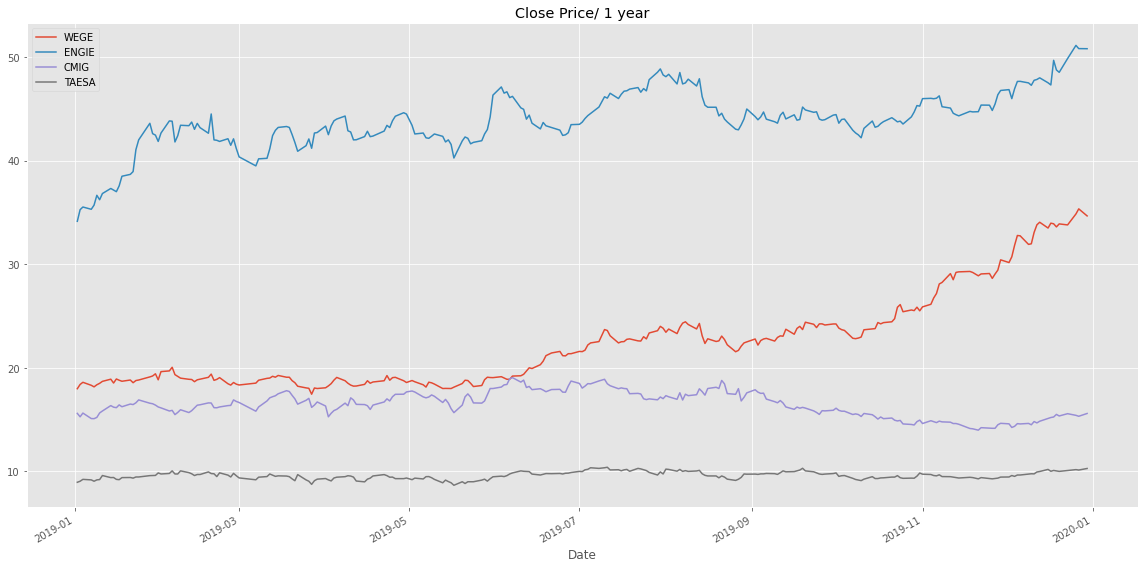

In [12]:
plt.style.use('ggplot')
wege['Close'].plot(label='WEGE',title='Close Price/ 1 year',figsize=(16,8))
engie['Close'].plot(label='ENGIE')
cmig['Close'].plot(label='CMIG')
taesa['Close'].plot(label='TAESA')
plt.tight_layout()
plt.legend()

# Volume Negociado 

As regras básicas para os volumes apresentadas por Majer & Deschatre no livro Aprenda a investir com sucesso em ações são:

- Quando preços e volume sobem, os preços tendem a aumentar ainda mais;

- Quando os preços estão subindo e o volume está diminuindo, a tendência de alta está para ser revertida (geralmente ocorre uma diminuição no ritmo de aumento de preços para, então, ocorrer a queda);

- Quando os preços estão caindo e o volume está subindo, a tendência é de diminuição de preços;

- Quando preços e volume estão caindo, a tendência de baixa está para ser revertida (geralmente ocorre uma diminuição no ritmo da queda dos preços para, então, haver um aumento).

Para ver a matéria completa: https://br.advfn.com/educacional/analise-tecnica/volume#:~:text=O%20volume%20%C3%A9%20um%20indicador,para%20um%20ativo%20em%20particular.

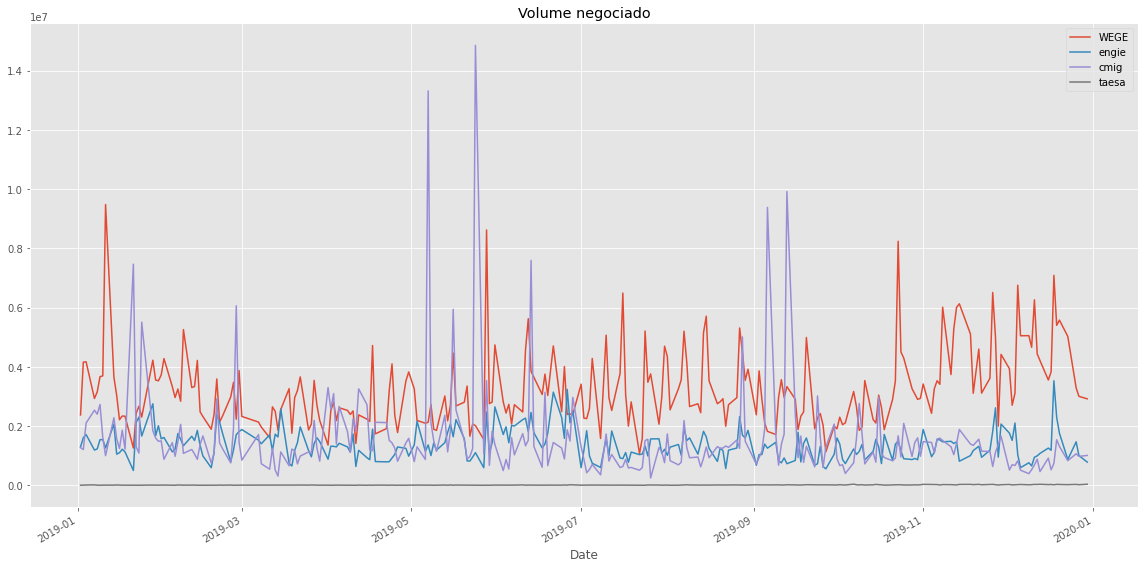

In [65]:
wege['Volume'].plot(label='WEGE',title='Volume negociado',figsize=(16,8))
engie['Volume'].plot(label='engie')
cmig['Volume'].plot(label='cmig')
taesa['Volume'].plot(label='taesa')
plt.tight_layout()
plt.legend()

In [67]:
wege['Total Traded'] = wege['Close'] * wege['Volume']
engie['Total Traded'] = engie['Close'] * engie['Volume']
cmig['Total Traded'] = cmig['Close'] * cmig['Volume']
taesa['Total Traded'] = taesa['Close'] * taesa['Volume']

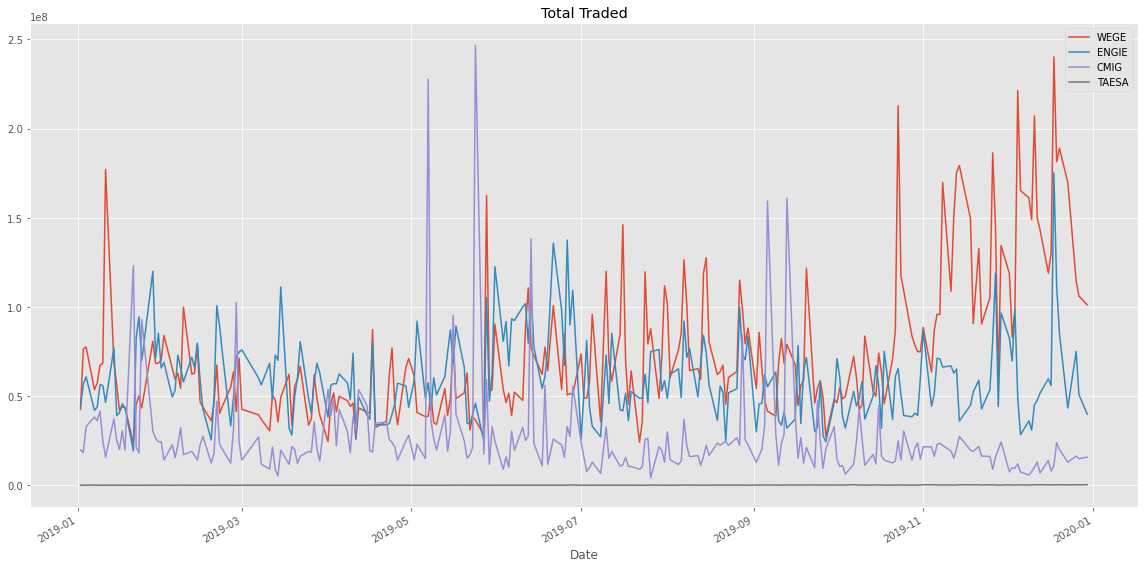

In [68]:
wege['Total Traded'].plot(label='WEGE',title='Total Traded',figsize=(16,8))
engie['Total Traded'].plot(label='ENGIE')
cmig['Total Traded'].plot(label='CMIG')
taesa['Total Traded'].plot(label='TAESA')
plt.tight_layout()
plt.legend()

# Média Móvel de 10 , 20 , 50 dias.

As médias móveis suavizam os dados de preços para formar um indicador de tendência sequencial. Elas não prevêem a direção dos preços, mas, antes, definem a sua direção atual com um atraso.

matéria: https://www.tororadar.com.br/investimento/analise-tecnica/medias-moveis

In [22]:
ma_day =[10,20,50]

for ma in ma_day:
    for company in company_list:
        column_name = f'MA for {ma} days'
        company[column_name] = company['Close'].rolling(ma).mean()

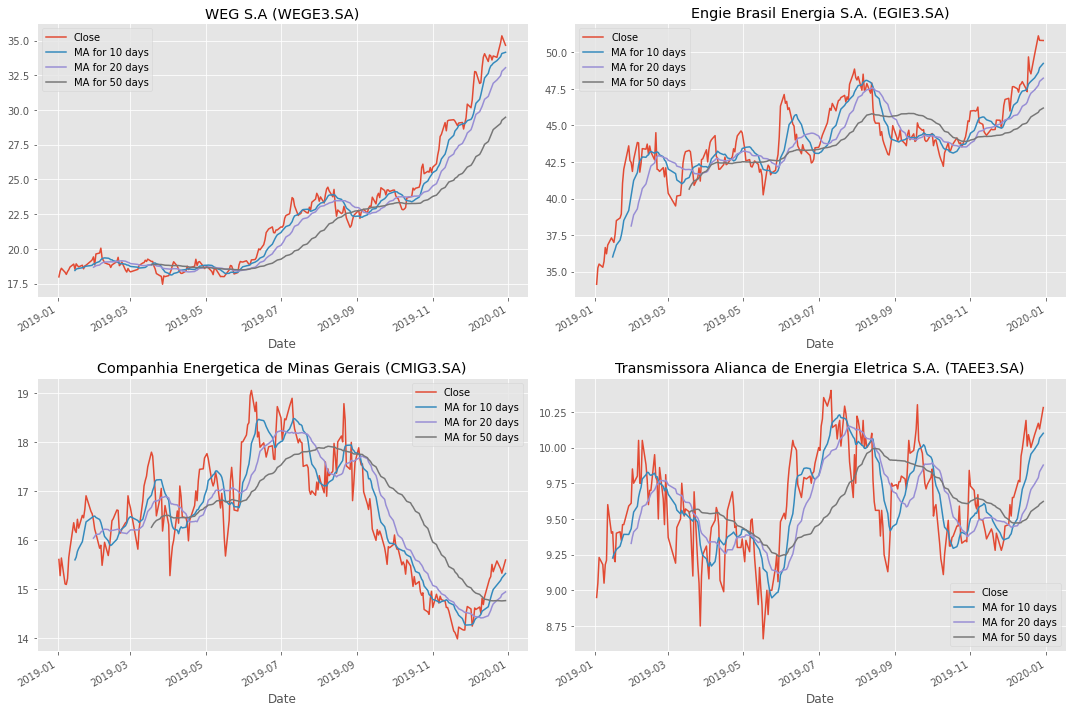

In [77]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

wege[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('WEG S.A (WEGE3.SA)')

engie[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('Engie Brasil Energia S.A. (EGIE3.SA)')

cmig[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('Companhia Energetica de Minas Gerais (CMIG3.SA)')

taesa[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('Transmissora Alianca de Energia Eletrica S.A. (TAEE3.SA)')

fig.tight_layout()

# Média Exponencial com 100 períodos.

A média móvel exponencial é uma extensão da média móvel simples, utilizando a suavização da mesma para reduzir a quantidade de sinais de compra ou venda. A média móvel exponencial (MME) é uma média ponderada de observações passadas e pode ser calculada através da seguinte fórmula:
# MMEx = ME(x-1) + K x {Fech(x) – ME(x-1)}

Matéria Completa: https://br.advfn.com/educacional/analise-tecnica/media-movel-exponencial

In [56]:
med_expo = [100]

for i in med_expo:
    for company in company_list:
        column_name = f'Media Exponencial {i}'
        company[column_name] = company['Close'].ewm(span=i).mean();

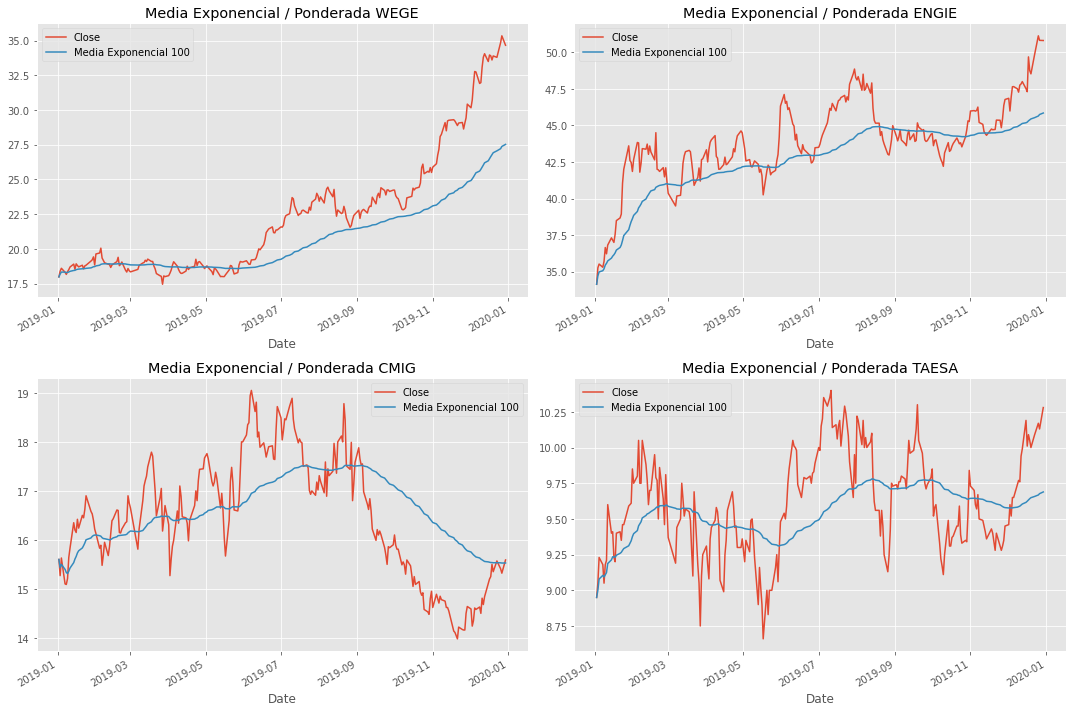

In [62]:
plt.style.use('ggplot')
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

wege[['Close','Media Exponencial 100']].plot(ax=axes[0,0])
axes[0,0].set_title('Media Exponencial / Ponderada WEGE')

engie[['Close','Media Exponencial 100']].plot(ax=axes[0,1])
axes[0,1].set_title('Media Exponencial / Ponderada ENGIE')

cmig[['Close','Media Exponencial 100']].plot(ax=axes[1,0])
axes[1,0].set_title('Media Exponencial / Ponderada CMIG')

taesa[['Close','Media Exponencial 100']].plot(ax=axes[1,1])
axes[1,1].set_title('Media Exponencial / Ponderada TAESA')

plt.legend()
plt.tight_layout()

# Bandas Bollinger

As bandas são derivadas das médias móveis e mostram que, independente de qualquer movimento que o preço faça, ele tende a voltar a um equilíbrio. Portanto, temos aí um “estreitamento das bandas” no gráfico.
Segue abaixo a fórmula para calcular as bandas, segundo Bollinger:

Centro: média móvel simples de 20 períodos (se período = dias, então: 20 dias)
Banda superior: média móvel simples (20 períodos) + (2x desvio padrão de 20 dias)
Banda inferior: média móvel simples (20 períodos) – (2x desvio padrão de 20 dias)

Máteria completa: https://www.sunoresearch.com.br/artigos/bandas-de-bollinger/

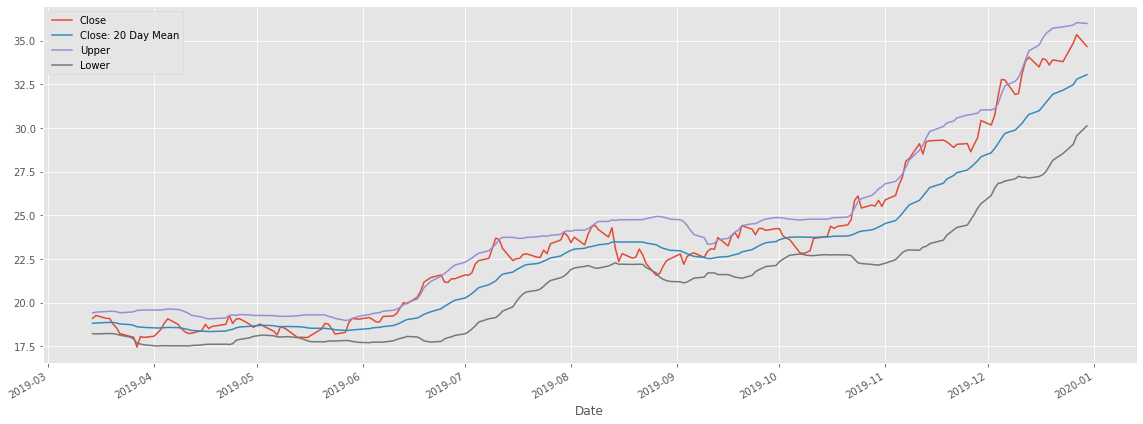

In [15]:
# Bollinger WEGE
# Close 20 MA
wege['Close: 20 Day Mean'] = wege['Close'].rolling(20).mean()
# upper = 20MA + 2*std(20)
wege['Upper'] = wege['Close: 20 Day Mean'] + 2 * (wege['Close'].rolling(20).std())
# Lower = 20MA - 2*std(20)
wege['Lower'] = wege['Close: 20 Day Mean'] - 2 * (wege['Close'].rolling(20).std())
# Close
wege[['Close','Close: 20 Day Mean','Upper','Lower']].tail(200).plot(figsize=(16,6))
plt.tight_layout()

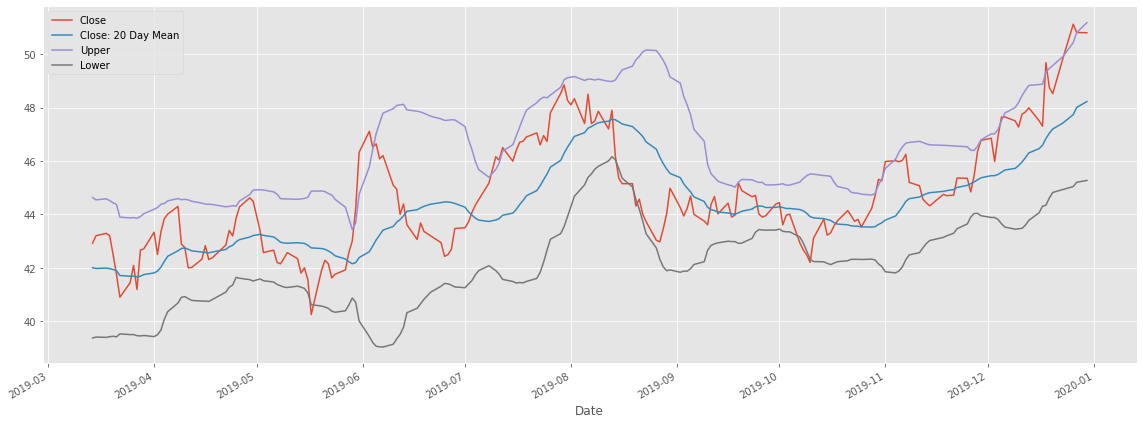

In [16]:
# Bollinger ENGIE

# Close 20 MA
engie['Close: 20 Day Mean'] = engie['Close'].rolling(20).mean()
# upper = 20MA + 2*std(20)
engie['Upper'] = engie['Close: 20 Day Mean'] + 2 * (engie['Close'].rolling(20).std())
# Lower = 20MA - 2*std(20)
engie['Lower'] = engie['Close: 20 Day Mean'] - 2 * (engie['Close'].rolling(20).std())
# Close
engie[['Close','Close: 20 Day Mean','Upper','Lower']].tail(200).plot(figsize=(16,6))
plt.tight_layout()

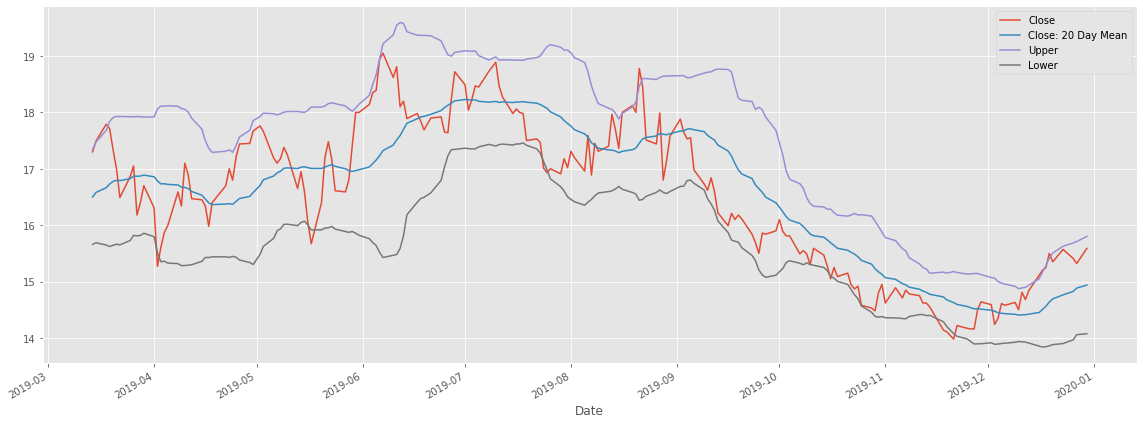

In [17]:
# Bollinger CMIG

# Close 20 MA
cmig['Close: 20 Day Mean'] = cmig['Close'].rolling(20).mean()
# upper = 20MA + 2*std(20)
cmig['Upper'] = cmig['Close: 20 Day Mean'] + 2 * (cmig['Close'].rolling(20).std())
# Lower = 20MA - 2*std(20)
cmig['Lower'] = cmig['Close: 20 Day Mean'] - 2 * (cmig['Close'].rolling(20).std())
# Close
cmig[['Close','Close: 20 Day Mean','Upper','Lower']].tail(200).plot(figsize=(16,6))
plt.tight_layout()

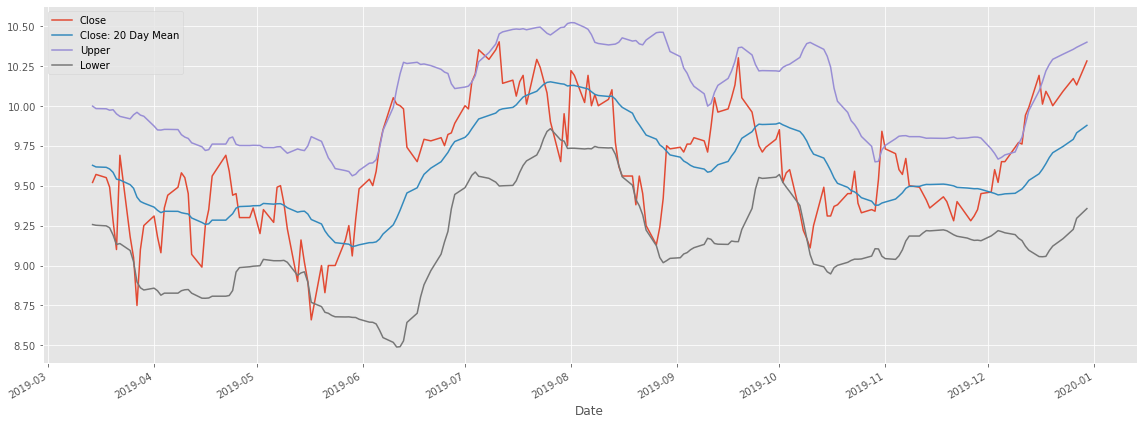

In [19]:
# Bollinger TAESA

# Close 20 MA
taesa['Close: 20 Day Mean'] = taesa['Close'].rolling(20).mean()
# upper = 20MA + 2*std(20)
taesa['Upper'] = taesa['Close: 20 Day Mean'] + 2 * (taesa['Close'].rolling(20).std())
# Lower = 20MA - 2*std(20)
taesa['Lower'] = taesa['Close: 20 Day Mean'] - 2 * (taesa['Close'].rolling(20).std())
# Close
taesa[['Close','Close: 20 Day Mean','Upper','Lower']].tail(200).plot(figsize=(16,6))
plt.tight_layout()

# Retorno Diário

Isso define r_t (retorno no tempo t) como igual ao preço no tempo t dividido pelo preço no tempo t-1 (no dia anterior) menos 1. Basicamente, isso apenas informa seu percentual de ganho (ou perda) se você comprou o estoque no dia e depois vendeu no dia seguinte. Embora isso não seja necessariamente útil para tentar prever valores futuros da ação, é muito útil para analisar a volatilidade da ação. Se os retornos diários tiverem uma ampla distribuição, o estoque será mais volátil de um dia para o outro. Vamos calcular os retornos percentuais e, em seguida, plotá-los com um histograma e decidir qual estoque é o mais estável!
O calculo de retorno diario seria é:
# 𝑟𝑡=𝑝𝑡𝑝𝑡−1−1

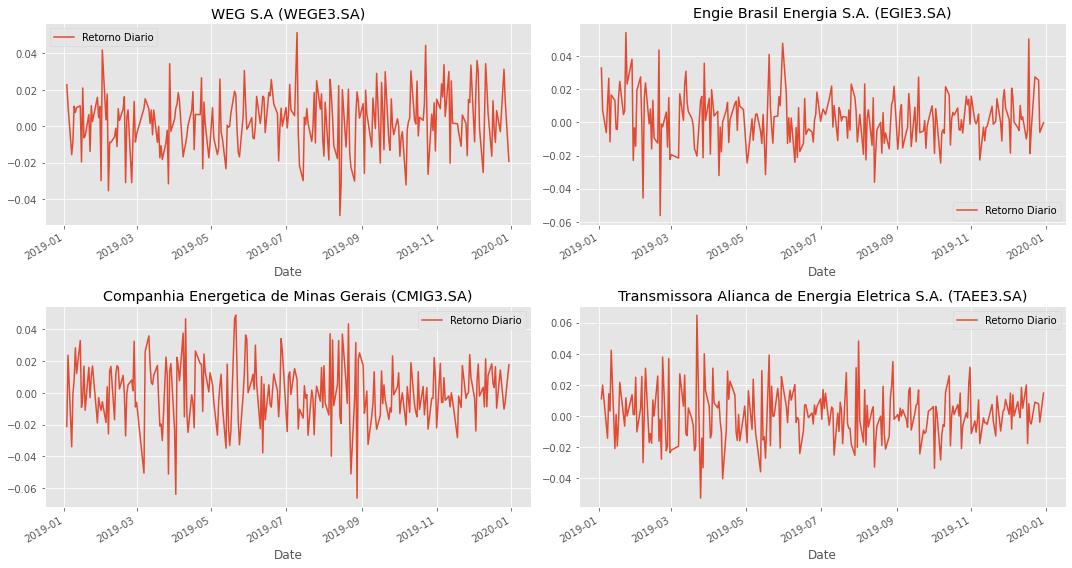

In [86]:
for company in company_list:
    company['Retorno Diario'] = company['Close'].pct_change()
    
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

wege['Retorno Diario'].plot(ax=axes[0,0],legend=True)
axes[0,0].set_title('WEG S.A (WEGE3.SA)')
engie['Retorno Diario'].plot(ax=axes[0,1],legend=True)
axes[0,1].set_title('Engie Brasil Energia S.A. (EGIE3.SA)')
cmig['Retorno Diario'].plot(ax=axes[1,0],legend=True)
axes[1,0].set_title('Companhia Energetica de Minas Gerais (CMIG3.SA)')
taesa['Retorno Diario'].plot(ax=axes[1,1],legend=True)
axes[1,1].set_title('Transmissora Alianca de Energia Eletrica S.A. (TAEE3.SA)')

plt.tight_layout()

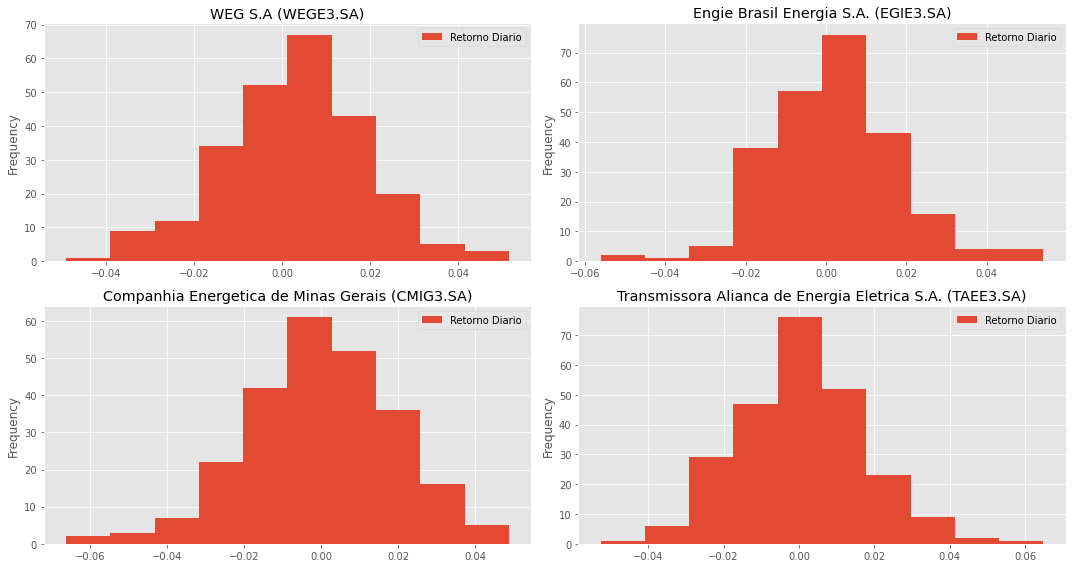

In [89]:
for company in company_list:
    company['Retorno Diario'] = company['Close'].pct_change()
    

fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

wege['Retorno Diario'].plot(kind='hist',ax=axes[0,0],legend=True)
axes[0,0].set_title('WEG S.A (WEGE3.SA)')
engie['Retorno Diario'].plot(kind='hist',ax=axes[0,1],legend=True)
axes[0,1].set_title('Engie Brasil Energia S.A. (EGIE3.SA)')
cmig['Retorno Diario'].plot(kind='hist',ax=axes[1,0],legend=True)
axes[1,0].set_title('Companhia Energetica de Minas Gerais (CMIG3.SA)')
taesa['Retorno Diario'].plot(kind='hist',ax=axes[1,1],legend=True)
axes[1,1].set_title('Transmissora Alianca de Energia Eletrica S.A. (TAEE3.SA)')

plt.tight_layout()

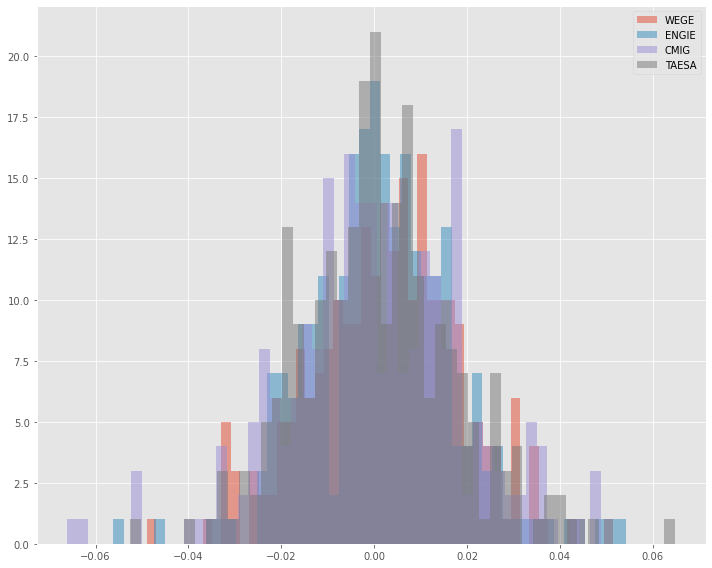

In [92]:
wege['Retorno Diario'].hist(bins=50,label='WEGE',figsize=(10,8),alpha=0.5)
engie['Retorno Diario'].hist(bins=50,label='ENGIE',alpha=0.5)
cmig['Retorno Diario'].hist(bins=50,label='CMIG',alpha=0.5)
taesa['Retorno Diario'].hist(bins=50,label='TAESA',alpha=0.5)
plt.tight_layout()
plt.legend()

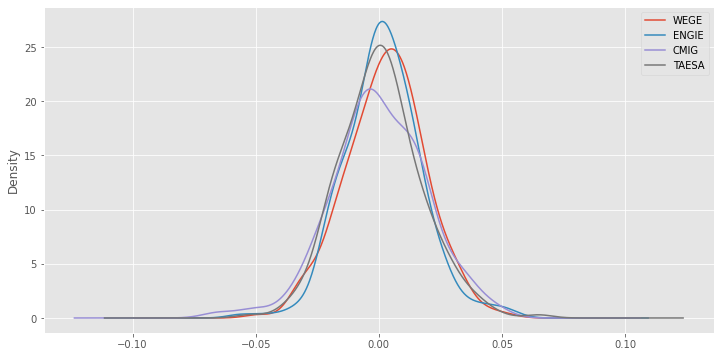

In [93]:
wege['Retorno Diario'].plot(kind='kde',label='WEGE',figsize=(12,6))
engie['Retorno Diario'].plot(kind='kde',label='ENGIE')
cmig['Retorno Diario'].plot(kind='kde',label='CMIG')
taesa['Retorno Diario'].plot(kind='kde',label='TAESA')
plt.legend()

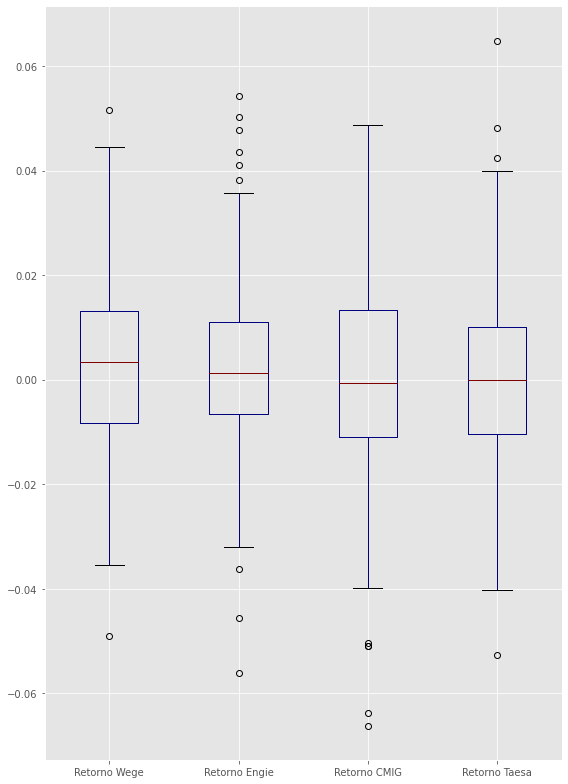

In [96]:
box_df = pd.concat([wege['Retorno Diario'],engie['Retorno Diario'],cmig['Retorno Diario'],taesa['Retorno Diario']],axis=1)
box_df.columns = ['Retorno Wege','Retorno Engie','Retorno CMIG','Retorno Taesa']
box_df.plot(kind='box',figsize=(8,11),colormap='jet')
plt.tight_layout()

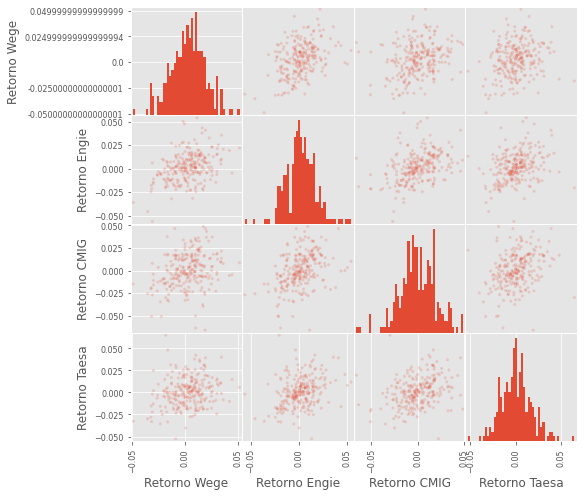

In [100]:
from pandas.plotting import scatter_matrix
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

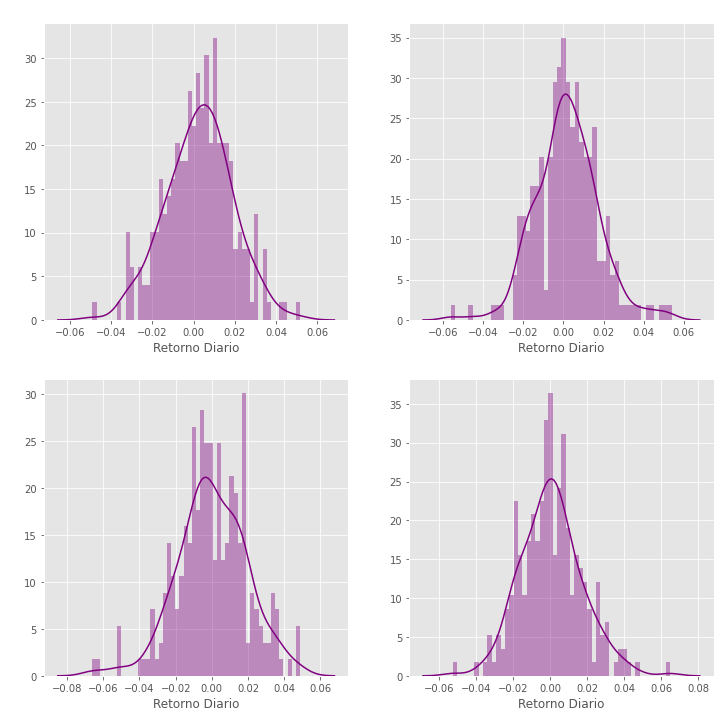

In [108]:
plt.figure(figsize=(12,12))

for i, company in enumerate(company_list,1):
    plt.subplot(2,2,i)
    sns.distplot(company['Retorno Diario'].dropna(),bins=50,color='purple')
    plt.ylabel('Retorno Diario',color='white')
    plt.title(f'{company_name[i-1]}',color='white')

# Correlacões: basicamente analisando se alguma ação tem influencia em outras, ou algum padrão.

In [111]:
closing_df = DataReader(tech_list,'yahoo',start,end)['Close']

closing_df.head()

Symbols,WEGE3.SA,EGIE3.SA,CMIG3.SA,TAEE3.SA
Date,,,,
2019-01-02,17.980000,34.139999,15.60,8.95
2019-01-03,18.389999,35.259998,15.27,9.05
2019-01-04,18.600000,35.520000,15.63,9.23
2019-01-07,18.309999,35.299999,15.10,9.18
2019-01-08,18.160000,35.700001,15.09,9.05


In [112]:
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,WEGE3.SA,EGIE3.SA,CMIG3.SA,TAEE3.SA
Date,,,,
2019-01-02,NaN,NaN,NaN,NaN
2019-01-03,0.022803,0.032806,-0.021154,0.011173
2019-01-04,0.011419,0.007374,0.023576,0.019889
2019-01-07,-0.015591,-0.006194,-0.033909,-0.005417
2019-01-08,-0.008192,0.011331,-0.000662,-0.014161


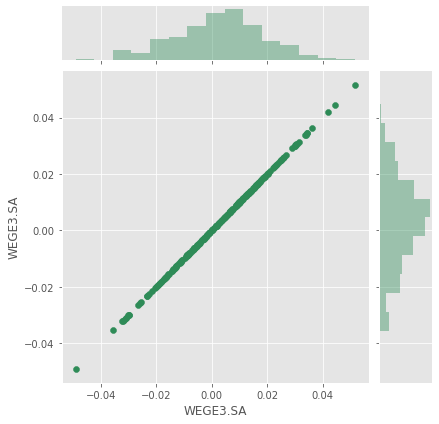

In [122]:
sns.jointplot('WEGE3.SA','WEGE3.SA',tech_rets,kind='scatter',color='seagreen')

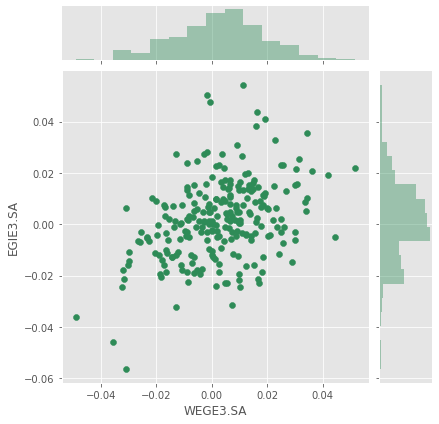

In [123]:
sns.jointplot('WEGE3.SA','EGIE3.SA',tech_rets,kind='scatter',color='seagreen')

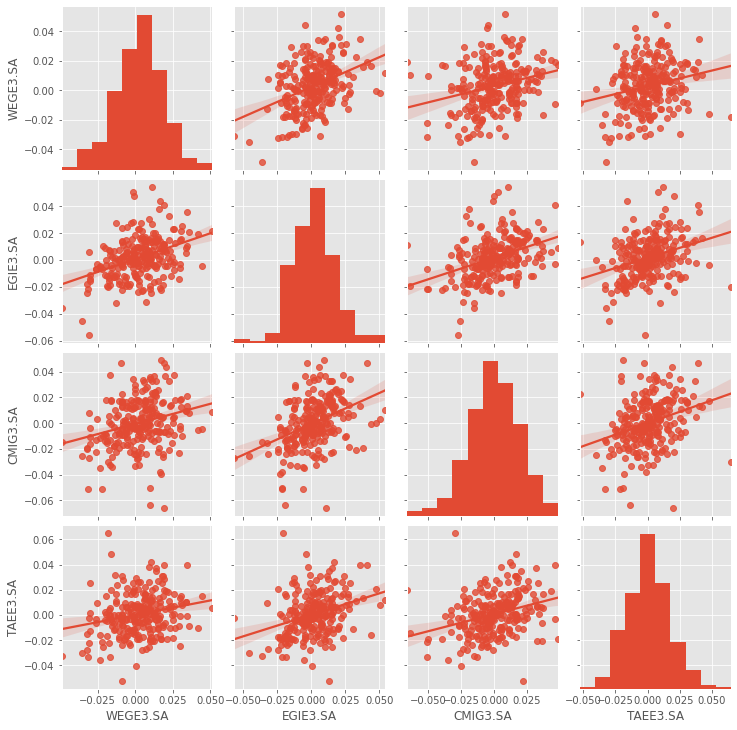

In [124]:
sns.pairplot(tech_rets,kind='reg')

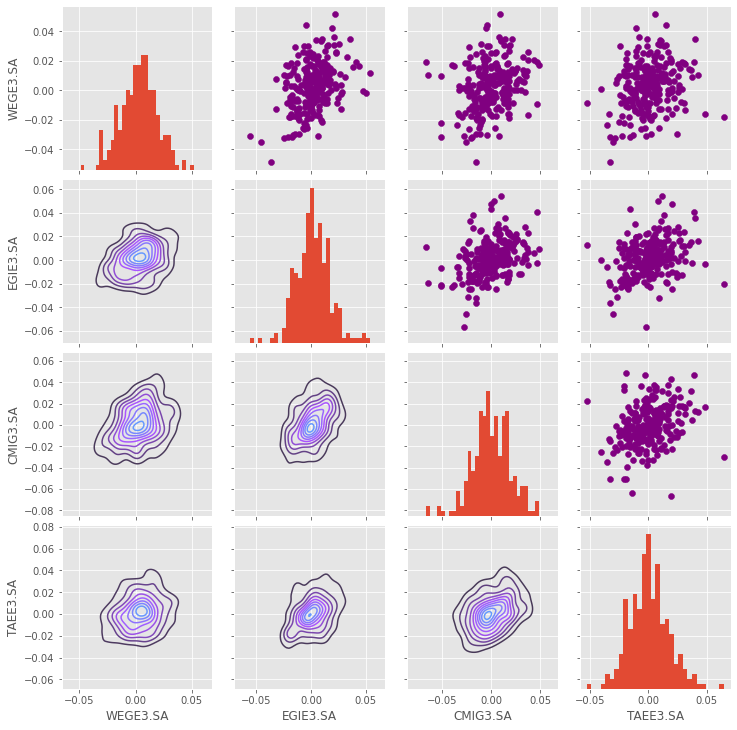

In [125]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

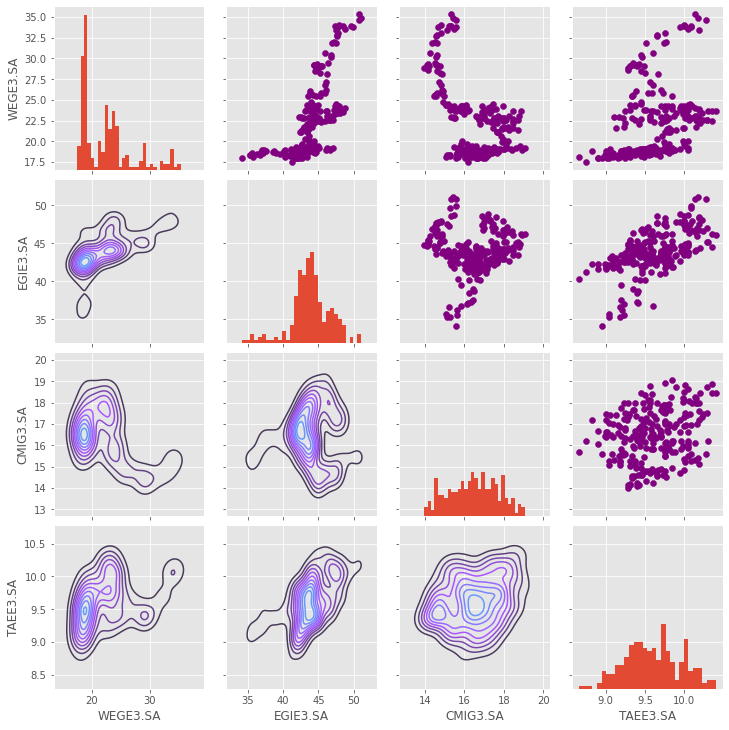

In [127]:
returns_fig = sns.PairGrid(closing_df)

# Usando o map eu to especificando o formato do triangulo

# Definindo o triangulo de cima como um scatter
returns_fig.map_upper(plt.scatter,color='purple')

# definindo o triangulo da parte de baixo da figura no caso um grafico de densidade kde
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Definindo a diagolnal do meio como um histograma plotado os retornos diarios
returns_fig.map_diag(plt.hist,bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

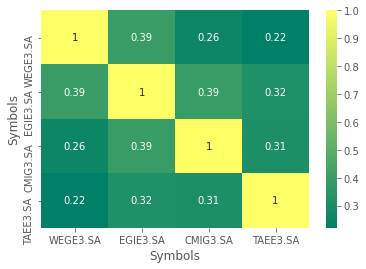

In [128]:
sns.heatmap(tech_rets.corr(),annot=True, cmap='summer')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

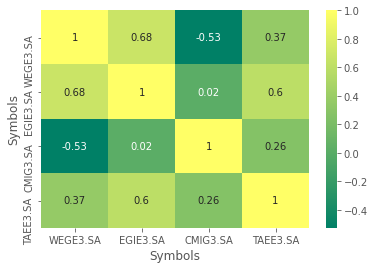

In [130]:
sns.heatmap(closing_df.corr(),annot=True, cmap='summer')

# Risco

Existem várias maneiras de quantificar o risco. Uma das maneiras mais básicas de usar as informações que coletamos sobre retornos percentuais diários é comparar o retorno esperado com o desvio padrão dos retornos diários.

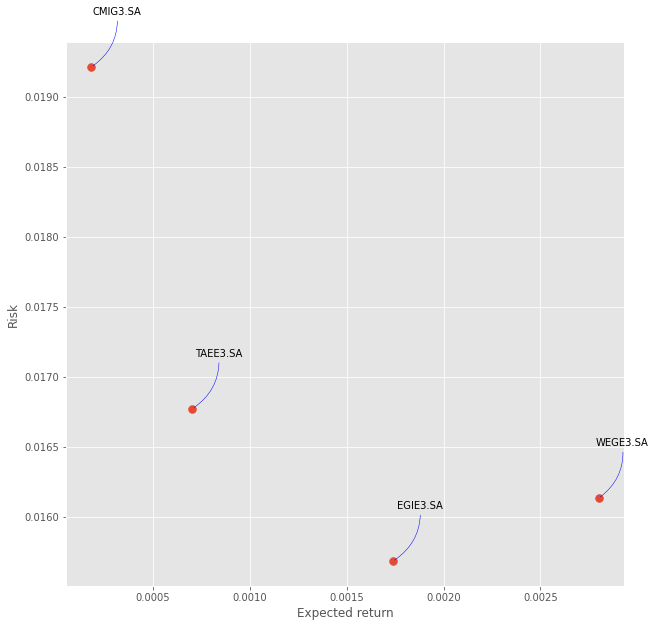

In [131]:
rets = tech_rets.dropna()

area = np.pi*20

plt.figure(figsize=(10, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# Retorno Acumulado 

Embora os retornos diários sejam úteis, não oferece ao investidor uma visão imediata dos ganhos que ele havia feito até a data, especialmente se a ação for muito volátil. O retorno acumulado é calculado em relação ao dia em que o investimento é feito. Se o retorno cumulativo for superior a um, você estará obtendo lucros, caso contrário estará perdendo. 
fórmula:
# 𝑖𝑖=(1+𝑟𝑡)∗𝑖𝑡−1

In [153]:
wege['Retorno Acumulado'] = (1 + wege['Retorno Diario']).cumprod()
engie['Retorno Acumulado'] = (1 + engie['Retorno Diario']).cumprod()
cmig['Retorno Acumulado'] = (1 + cmig['Retorno Diario']).cumprod()
taesa['Retorno Acumulado'] = (1 + taesa['Retorno Diario']).cumprod()

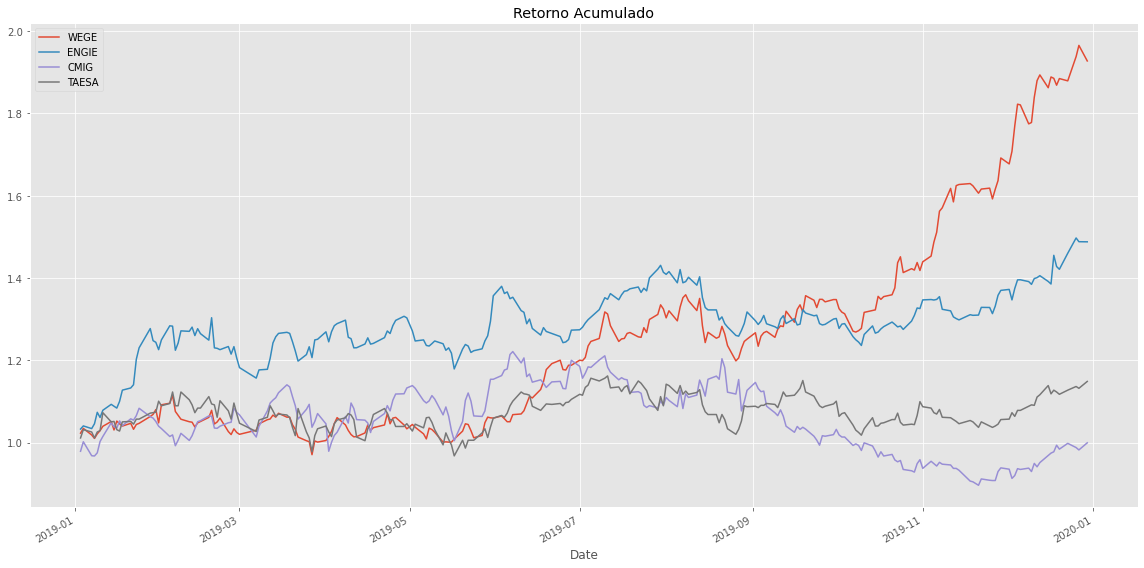

In [155]:
wege['Retorno Acumulado'].plot(label='WEGE',title='Retorno Acumulado',figsize=(16,8))
engie['Retorno Acumulado'].plot(label='ENGIE')
cmig['Retorno Acumulado'].plot(label='CMIG')
taesa['Retorno Acumulado'].plot(label='TAESA')
plt.tight_layout()
plt.legend()

# Machine Learning : introdução

In [133]:
from datetime import datetime
#Get the stock quote
df = DataReader('WEGE3.SA', data_source='yahoo', start='2012-01-01', end=datetime.now())
#Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-02,5.633140,5.520710,5.633140,5.520710,183534.0,4.056316
2012-01-03,5.943790,5.550300,5.550300,5.650890,3134950.0,4.151965
2012-01-04,5.710060,5.650890,5.650890,5.680470,569530.0,4.173700
2012-01-05,5.763310,5.621300,5.621300,5.715980,378898.0,4.199789
2012-01-06,5.798820,5.565090,5.786980,5.650890,1718730.0,4.151965
...,...,...,...,...,...,...
2020-07-27,71.019997,67.730003,67.809998,69.949997,7216800.0,69.949997
2020-07-28,69.849998,67.099998,69.800003,67.190002,6576300.0,67.190002
2020-07-29,68.050003,66.000000,67.760002,66.980003,6347700.0,66.980003


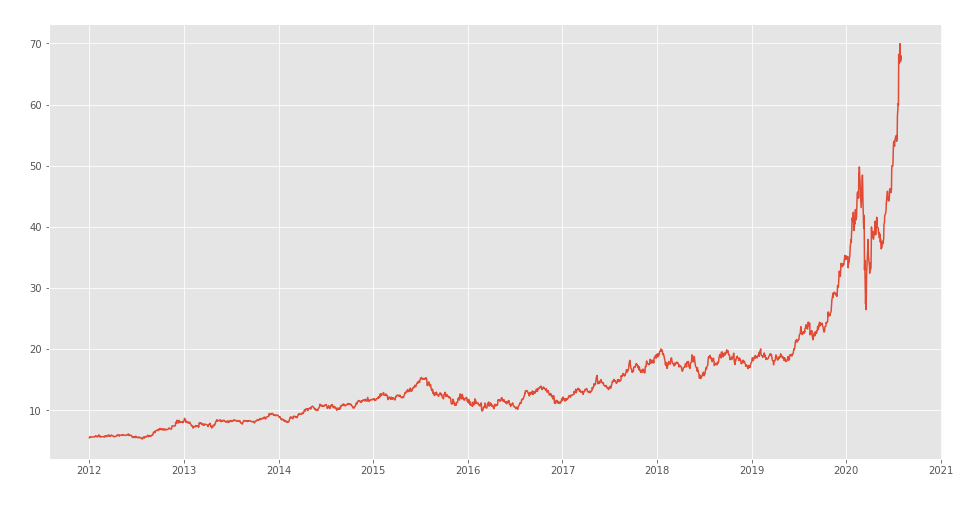

In [141]:
plt.figure(figsize=(16,8))
plt.title('Close Price History',color='white')
plt.plot(df['Close'])
plt.xlabel('Data', fontsize=18,color='white')
plt.ylabel('Preço de fechamento BRL ($)', fontsize=18,color='white')
plt.show()

In [135]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

1702

In [142]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00315843],
       [0.00517256],
       [0.00563022],
       ...,
       [0.95404864],
       [0.9698299 ],
       [0.95977316]])

In [143]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00315843, 0.00517256, 0.00563022, 0.00617962, 0.00517256,
       0.00517256, 0.00471475, 0.00471475, 0.00471475, 0.00517256,
       0.00517256, 0.00517256, 0.00494357, 0.00544719, 0.00535559,
       0.00549298, 0.0070035 , 0.00842258, 0.00746131, 0.00595064,
       0.00691191, 0.00682047, 0.00590484, 0.00563022, 0.00860561,
       0.01043655, 0.00938385, 0.00750711, 0.0058592 , 0.00769014,
       0.00521836, 0.00517256, 0.00517256, 0.0058592 , 0.00608803,
       0.00640845, 0.00544719, 0.00462315, 0.00517256, 0.00553878,
       0.00805636, 0.00759855, 0.00595064, 0.00750711, 0.00791897,
       0.00663728, 0.00723233, 0.00791897, 0.00947528, 0.01020772,
       0.00823939, 0.00929225, 0.00759855, 0.00910922, 0.00910922,
       0.00732392, 0.00929225, 0.0099789 , 0.00952108, 0.00842258])]
[0.008376779738315049]

[array([0.00315843, 0.00517256, 0.00563022, 0.00617962, 0.00517256,
       0.00517256, 0.00471475, 0.00471475, 0.00471475, 0.00517256,
       0.00517256, 0.00517256, 0.0

In [144]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Using TensorFlow backend.


Epoch 1/1
1642/1642 [==============================] - 712s 434ms/step - loss: 1.3007e-04


In [145]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

3.2944833890856575

/Users/usuario/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


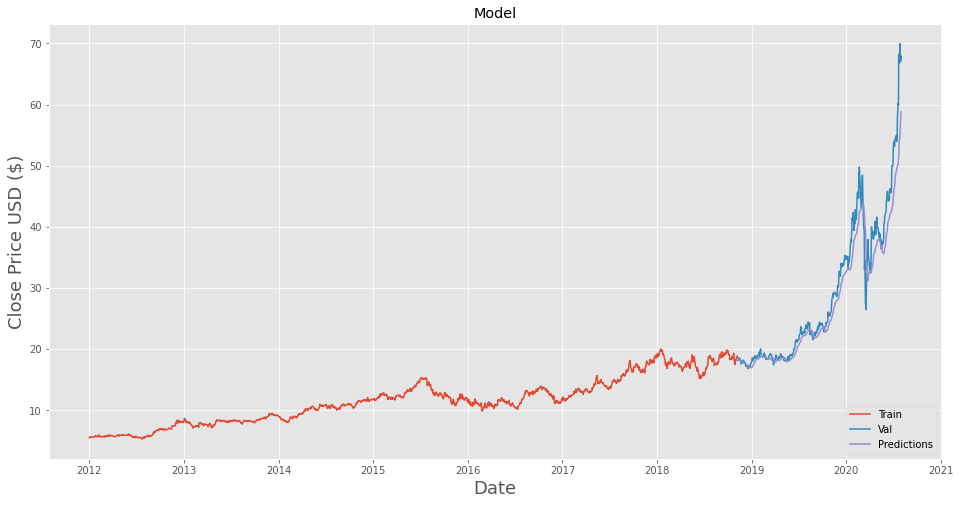

In [146]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [148]:
valid.tail()

,Close,Predictions
Date,,
2020-07-27,69.949997,55.104847
2020-07-28,67.190002,56.386002
2020-07-29,66.980003,57.392933
2020-07-30,68.000000,58.167324
2020-07-31,67.349998,58.820374
